<a href="https://colab.research.google.com/github/tomaskurtenperez/MLrepo/blob/main/PronosticoClimaBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/ColabNotebooks/Clima

Mounted at /content/gdrive
/content/gdrive/MyDrive/ColabNotebooks/Clima


In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/tomaskurtenperez/MLrepo/main/climaBA.csv")
df.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-01,NaN,NaN,86.0,67.0
1,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-02,NaN,NaN,88.0,69.0
2,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-03,NaN,NaN,86.0,67.0
3,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-04,NaN,NaN,77.0,65.0
4,AR000875850,"BUENOS AIRES OBSERV, AR",2002-01-05,NaN,NaN,68.0,62.0


In [ ]:
core_weather = df[["DATE","TMAX", "TMIN"]].copy()

In [ ]:
core_weather

,DATE,TMAX,TMIN
0,2002-01-01,86.0,67.0
1,2002-01-02,88.0,69.0
2,2002-01-03,86.0,67.0
3,2002-01-04,77.0,65.0
4,2002-01-05,68.0,62.0
...,...,...,...
5126,2023-04-27,NaN,59.0
5127,2023-04-28,83.0,63.0
5128,2023-04-29,81.0,64.0
5129,2023-04-30,NaN,NaN


In [ ]:
core_weather = core_weather.fillna(method="ffill")
core_weather

,DATE,TMAX,TMIN
0,2002-01-01,86.0,67.0
1,2002-01-02,88.0,69.0
2,2002-01-03,86.0,67.0
3,2002-01-04,77.0,65.0
4,2002-01-05,68.0,62.0
...,...,...,...
5126,2023-04-27,72.0,59.0
5127,2023-04-28,83.0,63.0
5128,2023-04-29,81.0,64.0
5129,2023-04-30,81.0,64.0


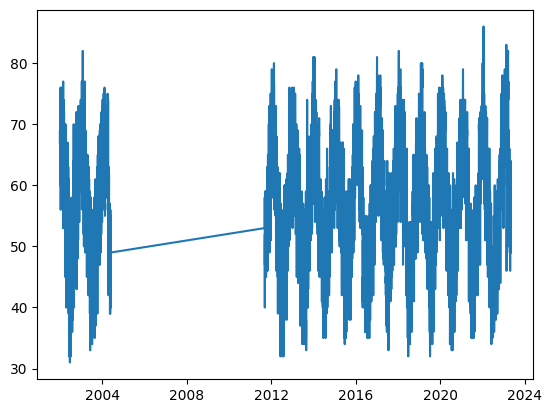

In [ ]:
core_weather['DATE'] = pd.to_datetime(core_weather['DATE'])
core_weather.head()
plt.plot(core_weather['DATE'], core_weather['TMIN'])
plt.show()

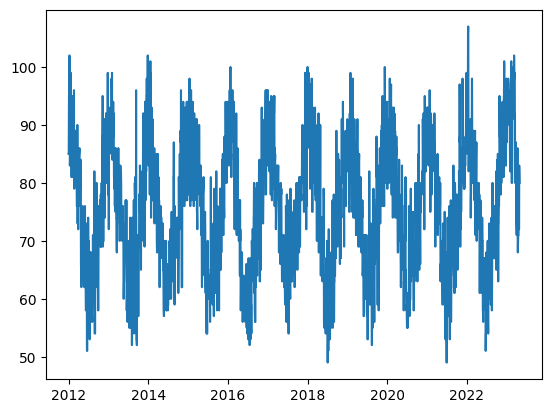

In [ ]:
core_weather['Year'] = core_weather['DATE'].apply(lambda x: x.year)
core_weather = core_weather[core_weather['Year']>=2012]
plt.plot(core_weather['DATE'], core_weather['TMAX'])
plt.show()

In [ ]:
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [ ]:
core_weather["TMIN"]=fahr_to_celsius(core_weather["TMIN"])
core_weather["TMAX"]=fahr_to_celsius(core_weather["TMAX"])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-77-4067bfc34b19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["TMIN"]=fahr_to_celsius(core_weather["TMIN"])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["TMIN"]=fahr_to_celsius(core_weather["TMIN"])

WARNING - (py.warnings._showwarnmsg) - <ipython-input-77-4067bfc34b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
dataMin = core_weather[['DATE', 'TMIN']] 
dataMin.dropna(inplace=True)
dataMin.columns = ['ds', 'y'] 
dataMax = core_weather[['DATE', 'TMAX']] 
dataMax.dropna(inplace=True)
dataMax.columns = ['ds', 'y'] 

WARNING - (py.warnings._showwarnmsg) - <ipython-input-84-88491e484ddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMin.dropna(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMin.dropna(inplace=True)

WARNING - (py.warnings._showwarnmsg) - <ipython-input-84-88491e484ddd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataMax.dropna(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [ ]:
from prophet import Prophet

In [ ]:
mMin = Prophet()
mMin.fit(dataMin)
mMax = Prophet()
mMax.fit(dataMax)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0d9p_vza/kv59f1lf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0d9p_vza/xxwd1bpb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20709', 'data', 'file=/tmp/tmp0d9p_vza/kv59f1lf.json', 'init=/tmp/tmp0d9p_vza/xxwd1bpb.json', 'output', 'file=/tmp/tmp0d9p_vza/prophet_modelpgfazzmr/prophet_model-20230512225512.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:55:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:55:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0d

In [ ]:
futureMin = mMin.make_future_dataframe(periods=250)
futureMin.tail()

,ds
4380,2024-01-02
4381,2024-01-03
4382,2024-01-04
4383,2024-01-05
4384,2024-01-06


In [ ]:
futureMax = mMax.make_future_dataframe(periods=250)
futureMax.tail()

,ds
4380,2024-01-02
4381,2024-01-03
4382,2024-01-04
4383,2024-01-05
4384,2024-01-06


In [ ]:
forecastMin = mMin.predict(futureMin)
forecastMin[['ds', 'yhat']].tail()

,ds,yhat
4380,2024-01-02,20.938342
4381,2024-01-03,21.294544
4382,2024-01-04,21.237260
4383,2024-01-05,21.157080
4384,2024-01-06,21.169733


In [ ]:
forecastMax = mMax.predict(futureMax)
forecastMax[['ds', 'yhat']].tail()

,ds,yhat
4380,2024-01-02,32.974248
4381,2024-01-03,33.079904
4382,2024-01-04,33.158038
4383,2024-01-05,33.250539
4384,2024-01-06,33.263684


In [ ]:
pronostMin = forecastMin[forecastMin['ds']>='2023-05-02']
pronostMin

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4135,2023-05-02,14.211821,8.168988,17.158433,14.211821,14.211821,-1.604617,-1.604617,-1.604617,-0.191951,-0.191951,-0.191951,-1.412665,-1.412665,-1.412665,0.0,0.0,0.0,12.607205
4136,2023-05-03,14.212337,8.371940,17.430553,14.212337,14.212337,-1.386785,-1.386785,-1.386785,0.141589,0.141589,0.141589,-1.528374,-1.528374,-1.528374,0.0,0.0,0.0,12.825552
4137,2023-05-04,14.212852,8.214236,17.029493,14.212852,14.212852,-1.568505,-1.568505,-1.568505,0.066898,0.066898,0.066898,-1.635403,-1.635403,-1.635403,0.0,0.0,0.0,12.644347
4138,2023-05-05,14.213367,7.660598,17.163511,14.213367,14.213367,-1.760609,-1.760609,-1.760609,-0.026542,-0.026542,-0.026542,-1.734067,-1.734067,-1.734067,0.0,0.0,0.0,12.452759
4139,2023-05-06,14.213883,7.674059,16.831063,14.213883,14.213883,-1.849057,-1.849057,-1.849057,-0.024102,-0.024102,-0.024102,-1.824955,-1.824955,-1.824955,0.0,0.0,0.0,12.364826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,2024-01-02,14.338104,16.664523,25.609204,14.322615,14.352423,6.600238,6.600238,6.600238,-0.191951,-0.191951,-0.191951,6.792189,6.792189,6.792189,0.0,0.0,0.0,20.938342
4381,2024-01-03,14.338619,16.930651,25.740269,14.323038,14.353035,6.955924,6.955924,6.955924,0.141589,0.141589,0.141589,6.814335,6.814335,6.814335,0.0,0.0,0.0,21.294544
4382,2024-01-04,14.339135,16.367770,25.716695,14.323461,14.353837,6.898125,6.898125,6.898125,0.066898,0.066898,0.066898,6.831227,6.831227,6.831227,0.0,0.0,0.0,21.237260
4383,2024-01-05,14.339650,16.321255,25.595013,14.323884,14.354444,6.817430,6.817430,6.817430,-0.026542,-0.026542,-0.026542,6.843972,6.843972,6.843972,0.0,0.0,0.0,21.157080


In [ ]:
pronostMax = forecastMax[forecastMin['ds']>='2023-05-02']
pronostMax

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4135,2023-05-02,24.989725,18.631184,27.715785,24.989725,24.989725,-1.684688,-1.684688,-1.684688,-0.043770,-0.043770,-0.043770,-1.640918,-1.640918,-1.640918,0.0,0.0,0.0,23.305037
4136,2023-05-03,24.991483,18.612033,27.318782,24.991483,24.991483,-1.810366,-1.810366,-1.810366,-0.014745,-0.014745,-0.014745,-1.795621,-1.795621,-1.795621,0.0,0.0,0.0,23.181117
4137,2023-05-04,24.993241,18.586719,27.408280,24.993241,24.993241,-1.956526,-1.956526,-1.956526,-0.008303,-0.008303,-0.008303,-1.948222,-1.948222,-1.948222,0.0,0.0,0.0,23.036715
4138,2023-05-05,24.994999,18.716319,27.481827,24.994999,24.994999,-2.080671,-2.080671,-2.080671,0.018039,0.018039,0.018039,-2.098710,-2.098710,-2.098710,0.0,0.0,0.0,22.914328
4139,2023-05-06,24.996757,18.053996,27.387197,24.996757,24.996757,-2.275963,-2.275963,-2.275963,-0.028839,-0.028839,-0.028839,-2.247125,-2.247125,-2.247125,0.0,0.0,0.0,22.720794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,2024-01-02,25.420430,28.443213,37.209566,25.382575,25.464440,7.553818,7.553818,7.553818,-0.043770,-0.043770,-0.043770,7.597588,7.597588,7.597588,0.0,0.0,0.0,32.974248
4381,2024-01-03,25.422188,28.376605,37.539416,25.383950,25.466425,7.657717,7.657717,7.657717,-0.014745,-0.014745,-0.014745,7.672462,7.672462,7.672462,0.0,0.0,0.0,33.079904
4382,2024-01-04,25.423946,28.569668,37.487813,25.385324,25.468403,7.734092,7.734092,7.734092,-0.008303,-0.008303,-0.008303,7.742396,7.742396,7.742396,0.0,0.0,0.0,33.158038
4383,2024-01-05,25.425704,28.877483,37.523794,25.386699,25.470382,7.824835,7.824835,7.824835,0.018039,0.018039,0.018039,7.806796,7.806796,7.806796,0.0,0.0,0.0,33.250539


In [ ]:
# merge = [pronostMin['yhat'], pronostMax['yhat']]
pronostMin['Tmin']=pronostMin['yhat']
pronostMax['Tmax']=pronostMax['yhat']
pronostico=pd.concat([pronostMin[['ds', 'Tmin']], pronostMax['Tmax']], axis=1, join='inner')
# pronostico = pd.concat(merge)
pronostico

WARNING - (py.warnings._showwarnmsg) - <ipython-input-109-322dc506723f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pronostMin['Tmin']=pronostMin['yhat']

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pronostMin['Tmin']=pronostMin['yhat']

WARNING - (py.warnings._showwarnmsg) - <ipython-input-109-322dc506723f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,ds,Tmin,Tmax
4135,2023-05-02,12.607205,23.305037
4136,2023-05-03,12.825552,23.181117
4137,2023-05-04,12.644347,23.036715
4138,2023-05-05,12.452759,22.914328
4139,2023-05-06,12.364826,22.720794
...,...,...,...
4380,2024-01-02,20.938342,32.974248
4381,2024-01-03,21.294544,33.079904
4382,2024-01-04,21.237260,33.158038
4383,2024-01-05,21.157080,33.250539


In [ ]:
from google.colab import files
pronostico.to_excel("output.xlsx",
             sheet_name='Sheet_name_1') 
files.download('output.xlsx')
pronostico.to_csv('pronostico.csv')
files.download('pronostico.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>